In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import nbinteract as nbi
from ipywidgets import interact
import seaborn as sns

df= pd.read_csv('results_csv/genre_timeline_full.csv', sep=',')
df_count = df.groupby(['year'])['count'].sum().reset_index(name='count_year') 
genre_list = sorted(set(df["genre"].to_list()))

In [3]:
def plot_genre(genre):
    df_new = df[df["genre"] == genre]
    x = df_new["year"].to_list()
    y = df_new["count"].to_list()

    for i in range(len(x)):
        count_year = df_count[df_count["year"] == x[i]]
        y[i] = float(y[i] / (count_year["count_year"])) * 100 
    
    df_new["count"] = y
    plt.figure(figsize=(15,5))
        
    sns.barplot(data=df_new,x="year", y='count', color='salmon')    
    plt.xlabel('year')
    plt.ylabel('%')
    plt.xticks(rotation=70)
    plt.title(genre)
    plt.show()

interact(plot_genre, genre=genre_list);

interactive(children=(Dropdown(description='genre', options=('Avant_Garde', 'Blues', 'Children', 'Classical', …

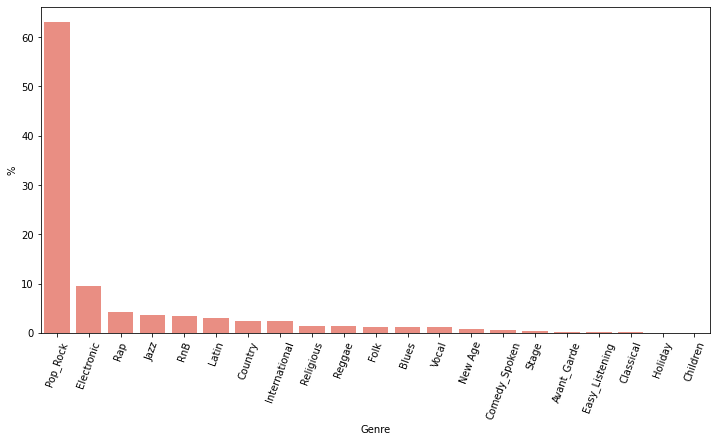

In [5]:
df_all = df.groupby(['genre'])['count'].sum().reset_index(name='total_genre')
df_all = df_all.sort_values(by='total_genre', ascending=False)

t = np.sum(df_all['total_genre'].to_list())
y = [((x/t)*100) for x in df_all['total_genre'].to_list()]
x = df_all["genre"].to_list()


plt.figure(figsize=(12,6))
sns.barplot(x=x, y=y, color='salmon')   
plt.xticks(rotation=70)
plt.xlabel('Genre')
plt.ylabel('%')
plt.savefig('genre_year.png', dpi=500)
plt.show()

In [6]:
df= pd.read_csv('results_csv/genre_timeline_full.csv', sep=',')
years = list(set(df["year"].to_list()))
df_count = df.groupby(['year'])['count'].sum().reset_index(name='count_year') 

def plot_year(year):
        
    df_new = df[df["year"] == year]
    
    y = df_new["count"].to_list()
    x = df_new["genre"].to_list()
    count_year = df_count[df_count["year"] == year]
    tot = int(count_year.count_year)
    print(tot)
    for i in range(len(x)):
        y[i] = float(y[i] / (tot)) * 100 
    
    y, x = zip(*sorted(zip(y, x)))
    x = x[::-1]
    y = y[::-1]
    plt.figure(figsize=(12,6))
    sns.barplot(x=list(x), y=list(y), color='salmon') 
    plt.xticks(rotation=70)
    plt.xlabel('genre')
    plt.ylabel('%')
    plt.show()
    

interact(plot_year, year=years)

interactive(children=(Dropdown(description='year', options=(1922, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 19…

<function __main__.plot_year(year)>

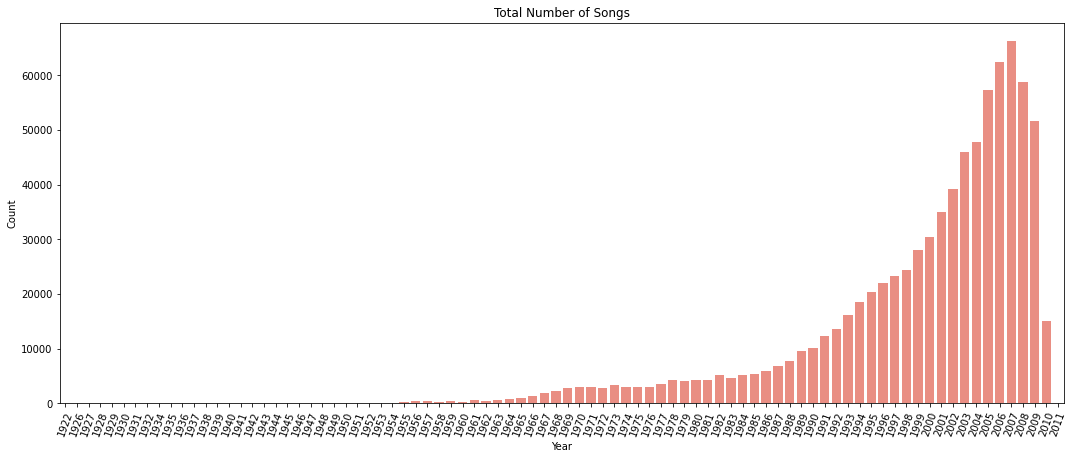

In [7]:
df= pd.read_csv('results_csv/genre_timeline_full.csv', sep=',')


df1 = df.groupby(['year'])['count'].sum().reset_index(name='count_year') 


x = df1["year"].to_list()
y = df1["count_year"].to_list()

x, y = zip(*sorted(zip(x, y)))
plt.figure(figsize=(18,7))
sns.barplot(x=list(x), y=list(y), color='salmon') 
plt.xticks(rotation=70)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total Number of Songs')
plt.show()

------
1922


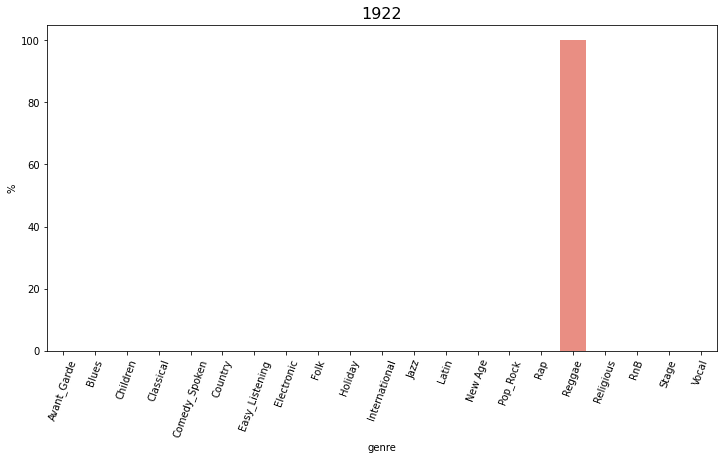

In [9]:
df= pd.read_csv('results_csv/genre_timeline_full.csv', sep=',')
years = list(set(df["year"].to_list()))
df_count = df.groupby(['year'])['count'].sum().reset_index(name='count_year') 

genres = sorted(list(set(df["genre"].to_list())))

for year in years:
    g = {}    
    df_new = df[df["year"] == year]
    
    y = df_new["count"].to_list()
    x = df_new["genre"].to_list()
    count_year = df_count[df_count["year"] == year]
    tot = int(count_year.count_year)
    for i in range(len(x)):
        y[i] = float(y[i] / (tot)) * 100 

    plt.figure(figsize=(12,6))

    for item in genres:
        g[item] = 0
    for i in range(len(x)):
        g[x[i]] = y[i]
    x = []
    y = []
    for key, value in g.items():
        x.append(key)
        y.append(value)
    sns.barplot(x=x, y=y, color='salmon') 
    plt.title(year, size=16)
    plt.xticks(rotation=70)
    plt.xlabel('genre')
    plt.ylabel('%')
    #uncomment the following line and comment the break in order to save the images for the GIF
    #plt.savefig('year/'+str(year), dpi=500)
    break

In [11]:
df = pd.read_csv('results_csv/hotness_timeline_full.csv', sep=",")
df_a = df.groupby(['artist_name']).size().reset_index(name='count_year')
df_a = df_a[df_a["count_year"] > 15]


df_merged = pd.merge(df, df_a, on=["artist_name"])
artists = sorted(set(df_a["artist_name"].to_list()))

def plot_artist(artist):
    df_a = pd.DataFrame()
    df_a = df_merged[df_merged["artist_name"] == artist]

    plt.figure(figsize=(17,6))
    sns.barplot(data=df_a,x="year", y='hotness_avg', color='salmon')
    plt.title(artist)
    plt.xticks(rotation = 70)
    plt.show()

interact(plot_artist, artist=artists);

interactive(children=(Dropdown(description='artist', options=('Aerosmith', 'Alabama', 'Alan Jackson', 'Alejand…

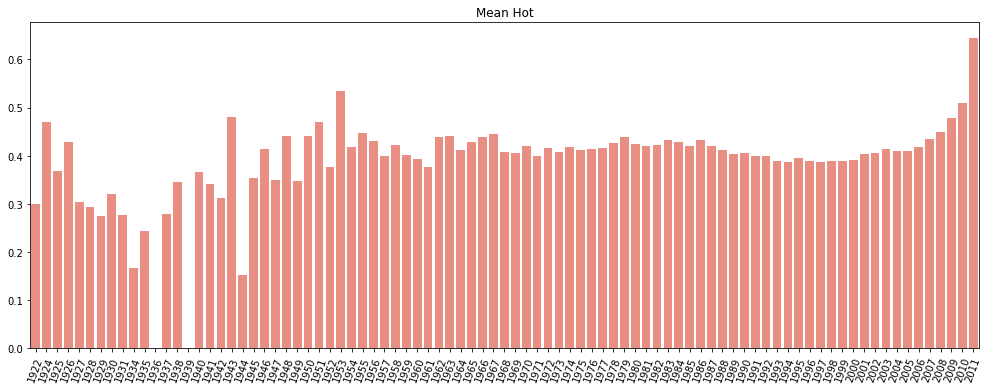

In [12]:
df_year = df.groupby('year')['hotness_avg'].mean().reset_index(name='hot_year') 
year = df_year["year"].to_list()
hot = df_year["hot_year"].to_list()
plt.figure(figsize=(17,6))
sns.barplot(x=year, y=hot, color='salmon')
plt.title('Mean Hot')
plt.xticks(rotation=70)
plt.show()

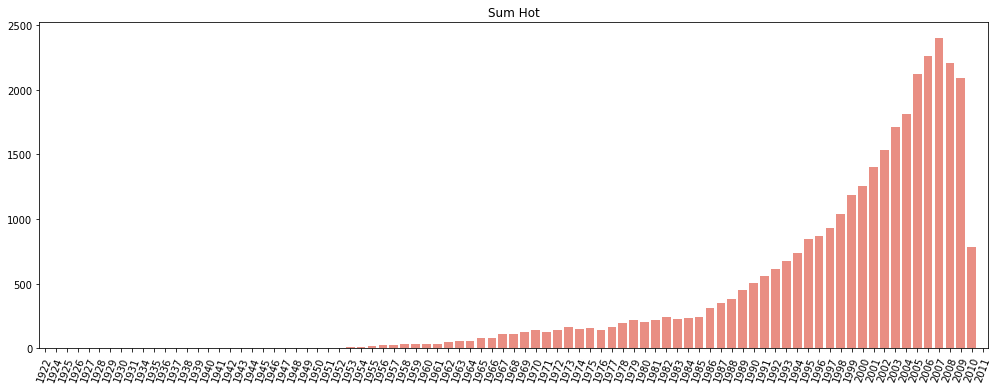

In [13]:
df_count = df.groupby(['year']).size().reset_index(name='counts')
count_year = df_count["counts"].to_list()

df_year = df.groupby('year')['hotness_avg'].sum().reset_index(name='hot_year')

year = df_year["year"].to_list()
hot = df_year["hot_year"].to_list()

plt.figure(figsize=(17,6))
sns.barplot(x=year, y=hot, color='salmon')
plt.title('Sum Hot')
plt.xticks(rotation=70)
plt.show()


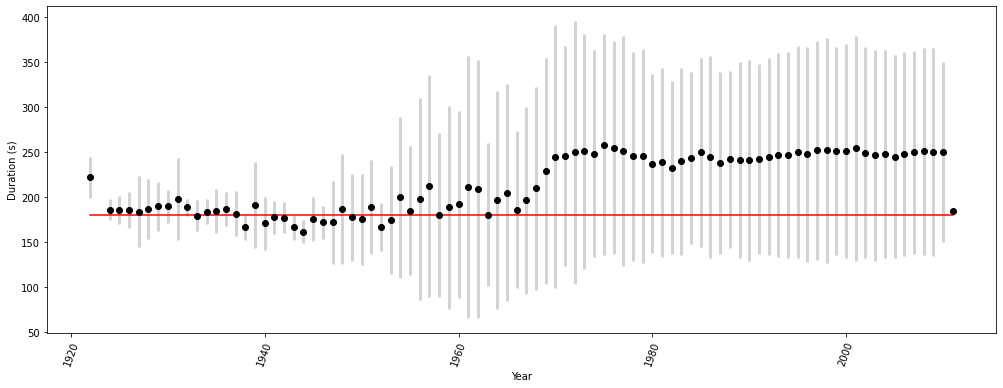

In [14]:
df = pd.read_csv('results_csv/duration_timeline_full.csv', sep=',')
years = set(df["year"].to_list())

df = pd.read_csv('results_csv/duration_timeline_full.csv', sep=',')


year = np.array(df["year"].to_list())
dur = np.array(df["duration_avg"].to_list())
sdt = np.array(df["stddev_avg"].to_list())
plt.figure(figsize=(17,6))
plt.errorbar(year, dur, yerr=sdt, fmt='o', color='black',
            ecolor='lightgray', elinewidth=3, capsize=0)
t = [180 for x in year]
plt.plot(year, t, color='red')
plt.xticks(rotation = 70)
plt.xlabel('Year')
plt.ylabel('Duration (s)')
plt.savefig('temp.png', dpi=100)
plt.show()

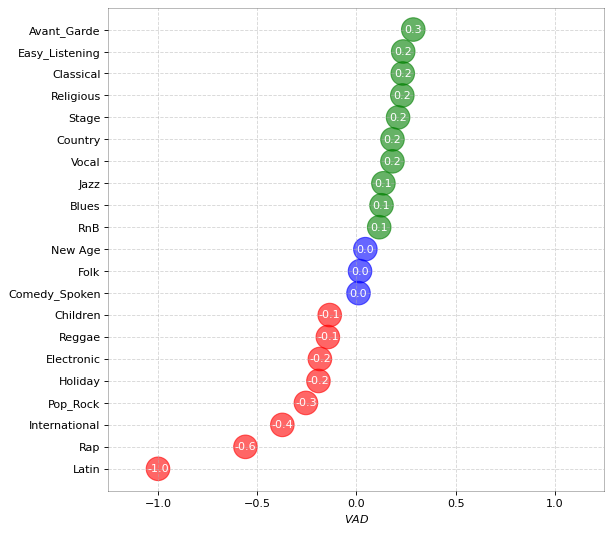

In [15]:
df = pd.read_csv("results_csv/results.csv")

colors = []
for x in df['VAD']:
    x = round(x,1)
    if x > 0:
        colors.append('green')
    elif x == 0:
        colors.append('blue')
    else:
        colors.append('red')

df["colors"] = colors
df.sort_values('VAD', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(8,8), dpi= 80)
plt.scatter(df.VAD, df.genre, s=450, alpha=.6, color=df.colors)
for x, y, tex in zip(df.VAD, df.genre, df.VAD):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color':'white'})

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(df.genre)
plt.xlabel('$VAD$')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-1.25, 1.25)
plt.savefig('VAD', dpi=1000)
plt.show()

In [ ]:
df = pd.read_csv('hotness_yearCount.csv', sep=',')

year = set(sorted(df["year"].to_list()))

for item in year:
    df_year = df[df["year"] == item]
    df_year["hotness"] = df_year["hotness_avg"] * df_year["song_count"]
    df_year = df_year.groupby('artist_name')['hotness'].sum().reset_index(name='hot')

    df_year = df_year.sort_values(by='hot', ascending=False)

    top = df_year["artist_name"].to_list()[:5]
    print('Year',item, 'Artist', top) 



df = pd.read_csv('hotness_timeline_full.csv', sep=",")
df_a = df.groupby(['artist_name']).size().reset_index(name='count_year')
df_a = df_a[df_a["count_year"] > 15]


df_merged = pd.merge(df, df_a, on=["artist_name"])
artists = set(df_a["artist_name"].to_list())
print(len(artists))





df = pd.read_csv('hotness_yearCount.csv', sep=',')

df1 = df.groupby('artist_name')['song_count'].sum().reset_index(name='count_song')



df2 = pd.read_csv('hotness_timeline.csv', sep=',')
df3 = df2.groupby('artist_name')['hotness_avg'].mean().reset_index(name='hotness')
df4 = df.groupby('artist_name')['year'].apply(list).reset_index(name='year')

l = []
years = df4["year"].to_list()

for item in years:
    l.append(len(item))

df4["len"] = l


df = pd.merge(df3, df1, on="artist_name")

df = pd.merge(df, df4, on="artist_name")



l = list(df["len"])
cnt = list(df["count_song"])


l_ = [x/sum(l) for x in l]
cnt_ = [x/sum(cnt) for x in cnt]


df["top"] =  (df["count_song"] * df["len"])* df["hotness"] 


df = df.sort_values(by="top", ascending=False)



df = df[:30]

df.to_csv('ruben_puzza.csv', index=False)
print(df)


for item in list(df["artist_name"])[:30]:
    print(item)